# ICS4U ISP Alex Chen

## Machine learning-based prediction of COVID-19 curve in Canada

### Part A

**1. Read in the cvs dataset as "data".**

In this case, I print the head five lines and the tail five lines of the dataset to test my code.

In [114]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv("covidtesting.csv")
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1,Date
0,2020/1/26,NaN,NaN,1.0,0,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2020/1/27,NaN,NaN,2.0,0,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2020/1/28,NaN,NaN,1.0,1,NaN,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,2020/1/30,NaN,NaN,0.0,2,NaN,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2020/1/31,NaN,NaN,0.0,2,NaN,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [115]:
#There are column names
data.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases',
       'Total patients approved for testing as of Reporting Date',
       'Total tests completed in the last day',
       'Percent positive tests in last day', 'Under Investigation',
       'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU due to COVID-19',
       'Number of patients in ICU, testing positive for COVID-19',
       'Number of patients in ICU, testing negative for COVID-19',
       'Number of patients in ICU on a ventilator due to COVID-19',
       'Num. of patients in ICU on a ventilator testing positive',
       'Num. of patients in ICU on a ventilator testing negative',
       'Total Positive LTC Resident Cases', 'Total Positive LTC HCW Cases',
       'Total LTC Resident Deaths', 'Total LTC HCW Deaths',
       'Total_Lineage_B.1.1.7', 'Total_Lineage_B.1.351', 'Total_Lineag

In [116]:
#Get the data type of each column
data.dtypes

Reported Date                                                 object
Confirmed Negative                                           float64
Presumptive Negative                                         float64
Presumptive Positive                                         float64
Confirmed Positive                                             int64
Resolved                                                     float64
Deaths                                                         int64
Total Cases                                                    int64
Total patients approved for testing as of Reporting Date     float64
Total tests completed in the last day                        float64
Percent positive tests in last day                           float64
Under Investigation                                            int64
Number of patients hospitalized with COVID-19                float64
Number of patients in ICU due to COVID-19                    float64
Number of patients in ICU, testing

### Part B

**2. Clean up any data necessary.**

In this dataset, there are many values which are not numbers (NaN). I need to clean all of them.

In [117]:
# Drop those awful subsets!
data.dropna(subset=['Confirmed Positive', 'Deaths', 'Total Cases'])

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,...,Num. of patients in ICU on a ventilator testing positive,Num. of patients in ICU on a ventilator testing negative,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,Total_Lineage_B.1.1.7,Total_Lineage_B.1.351,Total_Lineage_P.1,Date
0,2020/1/26,NaN,NaN,1.0,0,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2020/1/27,NaN,NaN,2.0,0,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2020/1/28,NaN,NaN,1.0,1,NaN,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,2020/1/30,NaN,NaN,0.0,2,NaN,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2020/1/31,NaN,NaN,0.0,2,NaN,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2021/4/29,NaN,NaN,NaN,38438,413010.0,8029,459477,14052764.0,56939.0,...,579.0,41.0,15137.0,6958.0,3918.0,10.0,62944.0,243.0,501.0,449
449,2021/4/30,NaN,NaN,NaN,38062,417252.0,8050,463364,14105838.0,53074.0,...,591.0,41.0,15141.0,6959.0,3918.0,10.0,65960.0,274.0,645.0,450
450,2021/5/1,NaN,NaN,NaN,37438,421216.0,8079,466733,14152641.0,46803.0,...,593.0,44.0,15151.0,6963.0,3918.0,10.0,69442.0,281.0,772.0,451
451,2021/5/2,NaN,NaN,NaN,37200,425163.0,8102,470465,14197942.0,45301.0,...,577.0,38.0,15157.0,6967.0,3918.0,10.0,72313.0,291.0,875.0,452


## Part C

**3. Create plots that help explain the data.**

I. Line Chart of Day and Total Case

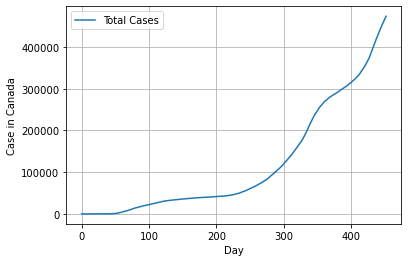

In [118]:
#Line Chart
data[["Total Cases"]].plot()
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('Case in Canada')
plt.show()

**Plot Explanation:**
It can be seen from this line chart that total COVID-19 cases in Canada almost completely fit the exponential growth, and the current growth rate is very high.

**Code Explanation:**
Firstly, I set the databases of Total cases as independent variables and state the grid as ture. Secondly, I input the title, x-axis label as "Day" and y-axis label as "Case in Canada". In the end, I print this line chart out.

II. Line Chart of Day and Confirmed Positive and Deaths

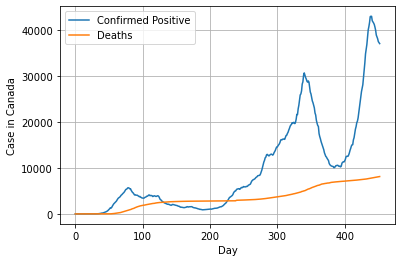

In [119]:
#Line Chart
data[["Confirmed Positive","Deaths"]].plot()
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('Case in Canada')
plt.show()

**Plot Explanation:**
It can be seen from this line chart that the cumulative number of confirmed COVID-19 cases in Canada has experienced three relatively large ups and downs but is still close to exponential growth, while the cumulative proportion of COVID-19 deaths in Canada has been increasing linearly.

**Code Explanation:**
Firstly, I set the databases of Confirmed Positive and Death cases as independent variables and state the grid as ture. Secondly, I input the title, x-axis label as "Day" and y-axis label as "Case in Canada". In the end, I print this line chart out.

III. Scatter Plot of Total patients approved for testing as of Reporting Date and Resolved

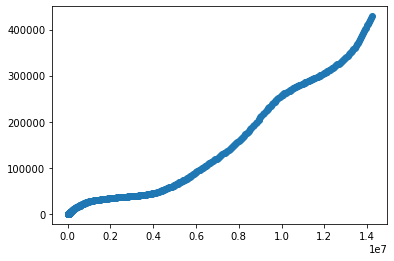

In [120]:
#Scatter Plot 
plt.scatter(data['Total patients approved for testing as of Reporting Date'], data['Resolved'])
plt.show()

**Plot Explanation:**
The scatter plot shows the potential relationship between one independent variable and one dependent variable. In this case, it is really obvious to identify a clear relationship between the number of total patients approved for testing and the resolved cases. From my perspective, the number of total patients approved for testing is a significant value for stopping COVID-19 spread.

**Code Explanation:**
Firstly, I set the databases of Total patients approved for testing as of Reporting Date and Resolved cases as independent variable and dependent variable. Secondly, I input the title, x-axis label and y-axis label. In the end, I print it out.

IV. The Pie Chart of Positive, Resolved and Death on May 3rd

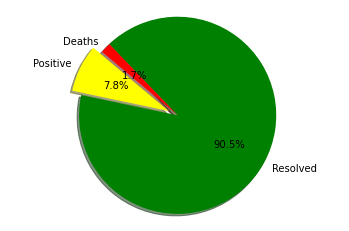

In [121]:
#Pie Chart
labels = 'Positive', 'Resolved', 'Deaths'
P = data['Confirmed Positive'][452]
R = data['Resolved'][452]
D = data['Deaths'][452]
sizes = [P,R,D]
colors = ['yellow','green','red']
explode = (0.1, 0, 0)

##Show
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Plot Explanation:**
This pie chart shows that although about 90% of COVID-19 cases in Canada have recovered on May 3rd, 8% of confirmed positive cases are still active in Canada. We still need to focus on how to stop the COVID-19 spread and remember it is not the end.

**Code Explanation:**
In order to calculate and state the percentage of these three values clearly, I choose pie chart. At the begining, I read the numbers of positive, resolved and death cases on May 3rd. After that, I call the function plt.pie with various colors and set the axis to 'equal'. Exploding the first slice is necessary because it notice the reader where to begin with.

V. The Bar Graph of Total Cases per month in 2021

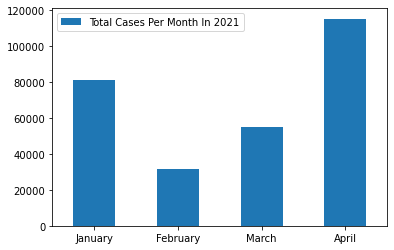

In [122]:
#Bar Graph
Jan = data['Total Cases'][363] - data['Total Cases'][332]
Feb = data['Total Cases'][391] - data['Total Cases'][363]
Mar = data['Total Cases'][422] - data['Total Cases'][391]
Apr = data['Total Cases'][452] - data['Total Cases'][422]
year = [Jan,Feb,Mar,Apr]

##Split every number of passengers into each class and print out
index = ['January', 'February', 'March','April']
df = pd.DataFrame({'Total Cases Per Month In 2021': year}, index=index)
ax = df.plot.bar(rot=0)

**Plot Explanation:**
This bar graph compares the total cases in each month in 2021 before May 1st. We can see that April is the month that has the highest number of cases in 2021 and February is the month that has the lowest number of cases in 2021. From my perspective, there is a rebound trend in April and May. We still need to pay attention in COVID-19.

**Code Explanation:**
In order to compare all of the total cases numbers directly in 2021, I choose bar graph and put the number per month in the same index. The call sentences are the key of this plot for finding four values. After that, I call the DataFrame.plot.bar function to create this plot and set the rot as zero.

## The Curve Prediction Algorithms edited by Alex Chen

### Part A

**Fix up my explorator analysis if necessary and change categorical data into numerical values.**

All values in this database is numerical values so there is no need to do this step.

### Part B

**I. Run all algorithms at least once.**

**II. Summarize the results from each algorithm.**

Firstly, we load the dataset into x variable and Y variable for buliding our own models. This code is to use **The Least Squares Regression Method** to fit the data after setting the function.

Coefficients
902.1954038686898 -85806.67897399834


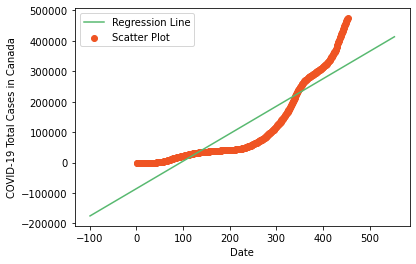

In [123]:
# Coomputing X and Y
X = data['Date'].values
Y = data['Total Cases'].values

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
 
# Printing coefficients
print("Coefficients")
print(m, c)

# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Date')
plt.ylabel('COVID-19 Total Cases in Canada')
plt.legend()
plt.show()

**Summary**

The least squares method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve. Least squares regression is used to predict the behavior of dependent variables. In this case, the linear relationship between the date of pandemic and the total COVID-19 cases in Canada is the target of this method. We can see that the true curve can not fit the linear line well so the least squares method is just the first step of out prediction.

Since the result is not so reasonable for predicting the future cases. I will use the ture **Curve Fit Method** to solve this problem.

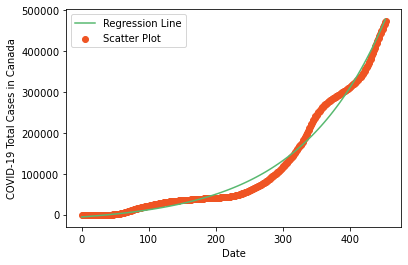

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the curve fit function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Read in x and y data
xdata = data['Date']
ydata = data['Total Cases']

# Print out what we get so far
popt, pcov = curve_fit(func, xdata, ydata, bounds=([-np.inf, -1, -np.inf], [np.inf, 1, np.inf]))
xs = np.linspace(0, 452, 100)
plt.plot(xs, func(xs, *popt), color='#58b970', label='Regression Line')
plt.scatter(xdata, ydata, c='#ef5423', label='Scatter Plot')
plt.xlabel('Date')
plt.ylabel('COVID-19 Total Cases in Canada')
plt.legend()
plt.show()

**Summary**

In regression analysis, curve fitting is the process of specifying the model that provides the best fit to the specific curves in your dataset. Curved relationships between variables are not as straightforward to fit and interpret as linear relationships. In this case, the curve fits the scatter plot very well. It is a very reasonable math model to predict the future total COVID-19 cases in the future even at different time point. 

**PS!!!**

When we use this kind of method, we really need to pay attention of its bounds. If we set the lowest bound too big or set the highest bound too small, the model will quickly reaches overflow. We can avoid the overflow with adding bounds on b. Note that we only get a warning, and that the result of curve_fit isn't affected. But we still want to find the best curve fit out so that is why I choose -1 and 1 as my lowest and highest bounds in the end.

### Part C

**I. Run the curve fit algorithm in their optimal states for each important time points.**

**II. Summarize the results and make conclusions based on the results and make suggestions.**

I. Predict the number of total cases in Canada on 2021/06/01

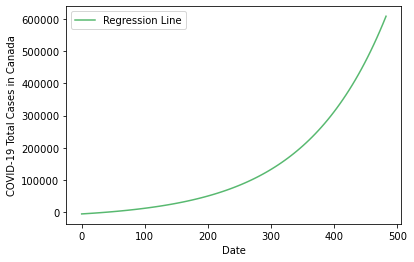

Exact number
609011.301366295


In [125]:
# Day 2021/06/01
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the curve fit function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Read in x and y data
xdata = data['Date']
ydata = data['Total Cases']

# Print out what we get so far
popt, pcov = curve_fit(func, xdata, ydata, bounds=([-np.inf, -1, -np.inf], [np.inf, 1, np.inf]))

# The date number of 2021/05/01 is 451, so plus 31 to get the date number of 2021/06/01
xs = np.linspace(0, 482, 100)
plt.plot(xs, func(xs, *popt), color='#58b970', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('COVID-19 Total Cases in Canada')
plt.legend()
plt.show()

# Print the exact number
print("Exact number")
print(func(482,*popt))

**Summary**

Form my best curve fit model, we know that the number of total COVID-19 cases is approximately 609,011 on 2021/06/01. Divided by the Canadian population in 2020 which is 37,742,154 people, the COVID-19 infection rate in Canada is 1.5%. What's more, it seems speed up its increasing rate on 2021/06/01.

II. Predict the number of total cases in Canada on 2021/09/01

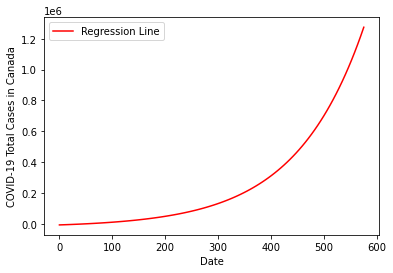

Exact number
1273934.8856654281


In [126]:
# Day 2021/09/01
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the curve fit function
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Read in x and y data
xdata = data['Date']
ydata = data['Total Cases']

# Print out what we get so far
popt, pcov = curve_fit(func, xdata, ydata, bounds=([-np.inf, -1, -np.inf], [np.inf, 1, np.inf]))

# The date number of 2021/06/01 is 482, so plus 93 to get the date number of 2021/09/01
xs = np.linspace(0, 575, 100)
plt.plot(xs, func(xs, *popt), color='red', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('COVID-19 Total Cases in Canada')
plt.legend()
plt.show()

# Print the exact number
print("Exact number")
print(func(575,*popt))

**Summary**

Form my best curve fit model, we know that the number of total COVID-19 cases is approximately 1,273,935 on 2021/09/01 which is twice as the number on 2021/06/01. Divided by the Canadian population in 2020 which is 37,742,154 people, the COVID-19 infection rate in Canada is 3.0%.

III. The SIR Epidemic Model (Introduction)

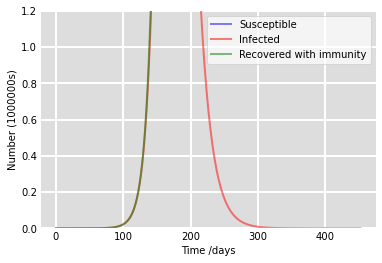

In [127]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population as N in Canada
N = 37742154
# Initial number of infected and recovered individuals as I0 and R0
I0, R0 = 1, 0
# Everyone else as S0 which is susceptible to infection initially
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate and gamma
beta, gamma = 0.2, 1./10 
# A grid of time points
t = np.linspace(0, 452, 452)

# The SIR model differential equations
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid as t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.7)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**Summary**

The SIR model is a communication model and an abstract description of the information dissemination process. It is the most classic model among infectious disease models, where S represents susceptible persons, I represents infected persons, and R represents removed persons.

In this case, plugging all data from our dataset into this model, we can see the susceptible, infected and recovered prediction curves very clearly. The predict number of cases on day 100 is very close to our target (real data) which is 21,581. However, the prediction after 100 days increase too fast compared with curve fit model prediction so it is not perfect yet. One thing we should know when we use it is be careful about the classification of SIR model.

The model's classification of the population is not detailed enough, and it does not explicitly consider the factors of isolation. In reality, the isolation of suspected patients is an effective means to control the spread of the epidemic. The model does not introduce a feedback mechanism. In the prediction process, simply predicting data for a long period of time in the future based on existing data will inevitably reduce the accuracy. In addition, the differential equations are difficult to solve and sensitive to initial values, which has a great influence on the robustness of the model.

**Conclusion**

Nowadays, COVID-19 has become a topic of most concern to people, and many professionals have different opinions on the prediction of this pandemic. This article is based on two simple models to predict and analyze the data of this pandemic. Of course, the results are for reference only. From the results in the article, if we do not adopt any new and effective policies for the current pandemic, this virus will spread to the whole of Canada on an exponentially increasing scale. By that time it will be very difficult to want to do something.

**Suggestion**

Health management departments should focus their efforts on strategies to help high-risk groups, rather than imposing comprehensive restrictions on everyone. 

Full implementation of the vaccination policy. 

Continue to track the development of the pandemic using technical means such as machine learning

### That is the end of my Prediction Algorithms Assignment. Thanks for reading!

## Alex Chen
## Ms. Postma
## ICS4U-01
## 2021/05/20